# Task 2: Player Segment Classification

In this task we will have to classified which segment of the user are which are: Casual player, Competitive grinder, Social player, and Whale. We will be using Multi-class classification for as a method for this task.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split


## Step 1: Data Preparation

### Step 1.1: Dowload Data

In [3]:
df = pd.read_csv('task2/train.csv')
df.head()

,id,player_id,play_frequency,avg_session_duration,total_playtime_hours,login_streak,days_since_last_login,total_spending_thb,avg_monthly_spending,spending_frequency,...,platform,device_type,payment_method,language,account_status,player_type_tag,engagement_level,loyalty_tier,skill_tier,segment
0,PLY00001,P050236,5.495437,24.837349,2740.945124,60.0,56.034052,58219.915660,434.038311,17.790970,...,PC,Phone,Wallet,DE,Active,Social,Low,Silver,NaN,0
1,PLY00002,P108696,9.991089,88.376322,NaN,22.0,75.036888,28966.163953,4233.532935,28.862134,...,Console,Desktop,Card,ES,Dormant,Collector,Low,Platinum,Gold,2
2,PLY00003,P113532,14.234225,101.712292,2828.479467,66.0,NaN,44478.823835,4849.491895,22.536406,...,PC,Laptop,NaN,EN,Dormant,Casual,High,Diamond,Gold,3
3,PLY00004,P123930,3.373683,191.975841,1915.082950,80.0,0.127910,57074.116993,6863.516123,10.565666,...,Console,Tablet,NaN,ES,Dormant,Competitive,Veteran,Silver,Gold,3
4,PLY00005,P068623,22.469353,28.042509,517.921948,NaN,45.078460,NaN,4408.101247,11.226504,...,PC,Tablet,Gift,EN,Active,Casual,Mid,Silver,NaN,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
play_frequency,93785.0,12.162113,7.112615,1.000033e+00,6.437830,11.449866,16.918216,50.186794
avg_session_duration,93771.0,107.922960,54.461009,2.000584e+01,64.559580,103.028355,144.677928,394.900718
total_playtime_hours,93887.0,1706.987371,939.497982,1.000188e+02,973.768239,1645.831217,2345.518903,6266.515056
login_streak,93938.0,55.095968,35.385126,0.000000e+00,27.000000,52.000000,79.000000,234.000000
days_since_last_login,93878.0,45.917386,20.763590,6.466683e-03,31.260410,45.724496,60.184174,130.071576
total_spending_thb,93902.0,34156.914790,22008.333299,5.003089e+02,16368.741422,31528.039053,48827.625917,148349.870989
avg_monthly_spending,93923.0,3304.075003,1929.848230,1.000826e+02,1780.923045,3160.767590,4611.562739,12637.762963
spending_frequency,93898.0,17.000950,9.602913,1.000775e+00,9.445409,16.251247,23.484908,60.936367
friend_count,93720.0,107.292168,65.017491,0.000000e+00,56.000000,103.000000,151.000000,410.000000
team_play_percentage,93963.0,50.226549,19.707257,5.000000e+00,36.615032,50.172440,63.661491,100.000000


In [5]:
df['segment'].value_counts()

segment
0    40064
1    25397
2    20549
3    15648
Name: count, dtype: int64

### Task 1.2: Missing Value

In [6]:
def create_null_table(df):
    null_count = df.isnull().sum()
    null_percentage = df.isnull().sum() * 100 / len(df)

    # Create table
    null_table = pd.concat([null_count, null_percentage] ,axis = 1)

    # Rename columns
    null_table = null_table.rename(columns={0: "Missing value counts", 1: "Missing value percentage"})

    # Sort value
    null_table = null_table[null_table.iloc[:,-1] != 0].sort_values('Missing value counts', ascending=False).round(1)
    return null_table

#### Step 1.2.1: Numerical Data

In [7]:
df_num = df.select_dtypes('number')

df_num.columns

Index(['play_frequency', 'avg_session_duration', 'total_playtime_hours',
       'login_streak', 'days_since_last_login', 'total_spending_thb',
       'avg_monthly_spending', 'spending_frequency', 'friend_count',
       'team_play_percentage', 'chat_activity_score', 'friend_invites_sent',
       'gifts_sent_received', 'ranked_participation_rate',
       'tournament_entries', 'competitive_rank', 'win_rate_ranked',
       'watches_esports', 'achievement_completion_rate', 'collection_progress',
       'rare_items_count', 'speed_of_progression',
       'item_type_preference_cosmetic', 'item_type_preference_performance',
       'item_type_preference_social', 'account_age_days', 'vip_tier',
       'responds_to_discounts', 'preferred_game_mode', 'avg_match_length',
       'peak_concurrent_hours', 'random_metric_1', 'random_metric_2',
       'random_metric_3', 'segment'],
      dtype='object')

In [8]:
num_null = create_null_table(df_num)

num_null

,Missing value counts,Missing value percentage
friend_count,7938,7.8
collection_progress,7914,7.8
item_type_preference_social,7902,7.8
achievement_completion_rate,7894,7.8
responds_to_discounts,7889,7.8
avg_session_duration,7887,7.8
watches_esports,7882,7.8
play_frequency,7873,7.7
tournament_entries,7854,7.7
avg_match_length,7853,7.7


Since the number of null value are really close for each columns, we would like to check whether it is related to each other.

In [9]:
df_num_drop = df_num.dropna(subset = ['peak_concurrent_hours'], how = 'any')

create_null_table(df_num_drop)

,Missing value counts,Missing value percentage
collection_progress,7340,7.8
friend_count,7327,7.8
play_frequency,7307,7.8
win_rate_ranked,7301,7.8
item_type_preference_social,7300,7.8
avg_match_length,7293,7.8
responds_to_discounts,7292,7.8
achievement_completion_rate,7288,7.8
watches_esports,7286,7.7
avg_session_duration,7282,7.7


The result sadly is *no*, so we have to approach with other method instead.

##### Replace the missing value

After observing we found that the minimum value of total spending is not 0, we diagnose that the data might store as null for the non spending value. The catch is that some rows having the total spending as null but they have the spending frequency and/or the average monthly spending value that is not 0. So, we have to carefully filled the value with the specific condition

In [10]:
df_mice = df_num.copy(deep=True)

mice_imputer = IterativeImputer()

df_mice = mice_imputer.fit_transform(df_mice)

In [11]:
df_num_filled = pd.DataFrame(df_mice, columns = df_num.columns)

df_num_filled

,play_frequency,avg_session_duration,total_playtime_hours,login_streak,days_since_last_login,total_spending_thb,avg_monthly_spending,spending_frequency,friend_count,team_play_percentage,...,account_age_days,vip_tier,responds_to_discounts,preferred_game_mode,avg_match_length,peak_concurrent_hours,random_metric_1,random_metric_2,random_metric_3,segment
0,5.495437,24.837349,2740.945124,60.000000,56.034052,58219.915660,434.038311,17.790970,58.0,47.791178,...,503.0,0.000000,1.000000,1.991093,39.255174,22.813403,466.695020,0.498406,139.0,0.0
1,9.991089,88.376322,1643.677401,22.000000,75.036888,28966.163953,4233.532935,28.862134,276.0,52.789877,...,500.0,3.000000,0.000000,0.000000,60.140761,25.409615,989.393688,0.089247,136.0,2.0
2,14.234225,101.712292,2828.479467,66.000000,40.142612,44478.823835,4849.491895,22.536406,71.0,58.267306,...,1390.0,3.000000,0.597961,0.000000,26.718983,59.151505,433.199081,0.261515,38.0,3.0
3,3.373683,191.975841,1915.082950,80.000000,0.127910,57074.116993,6863.516123,10.565666,105.0,67.274038,...,1123.0,3.000000,1.000000,2.000000,13.432821,47.247822,827.771953,0.604005,49.0,3.0
4,22.469353,28.042509,517.921948,54.708112,45.078460,33249.740245,4408.101247,11.226504,111.0,50.677100,...,580.0,2.000000,0.604532,1.966787,35.063033,47.015102,32.321928,0.350878,167.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101653,17.189970,125.413304,4042.198275,47.000000,42.264454,30455.881472,5058.189653,9.852469,179.0,11.689707,...,1056.0,1.000000,0.000000,4.000000,41.244437,96.660119,26.216671,0.249959,119.0,1.0
101654,7.560260,120.962552,1799.108384,20.000000,27.647682,29782.184066,1516.687257,8.235531,52.0,5.000000,...,956.0,1.000000,0.000000,4.000000,29.802865,35.052080,325.197382,0.293512,118.0,0.0
101655,11.765396,38.541917,1097.814242,25.000000,47.259330,39479.658717,3147.264423,9.703321,149.0,44.062523,...,458.0,1.725121,1.000000,3.000000,23.665582,19.805852,567.579047,0.503611,149.0,2.0
101656,12.898003,64.701401,3563.506452,120.000000,6.810932,48523.945493,1596.091703,31.721567,193.0,59.351458,...,1544.0,3.000000,0.000000,4.000000,32.225452,38.011697,396.194705,0.505487,226.0,3.0


#### Step 1.2.2: Categorical Data

In [12]:
df_cat = df.select_dtypes('object')

# These are teh categorical that we can replace them with numeric as ranking instead
to_num_cat = ['engagement_level', 'loyalty_tier', 'skill_tier']

df_cat.drop(to_num_cat, axis = 1, inplace = True)
df_cat.columns

Index(['id', 'player_id', 'region', 'platform', 'device_type',
       'payment_method', 'language', 'account_status', 'player_type_tag'],
      dtype='object')

Drop insignificant columns

In [13]:
df_cat.drop(columns = ['id', 'player_id'], inplace = True)

df_cat.columns

Index(['region', 'platform', 'device_type', 'payment_method', 'language',
       'account_status', 'player_type_tag'],
      dtype='object')

Check the null values

In [14]:
null_cat = create_null_table(df_cat)

null_cat

,Missing value counts,Missing value percentage
payment_method,31145,30.6
region,26535,26.1
player_type_tag,7920,7.8
language,7898,7.8
device_type,7814,7.7
account_status,7717,7.6
platform,7681,7.6


The percentage of missing value of *payment method* and *region* are huge, and we think this might be significant. So, we will try to use this as an information too.

In [15]:
def showRatio(df, column):
    count = dict(df[column].value_counts())
    count['null'] = df[column].isnull().sum()
    plt.bar(x=count.keys(), height = count.values())

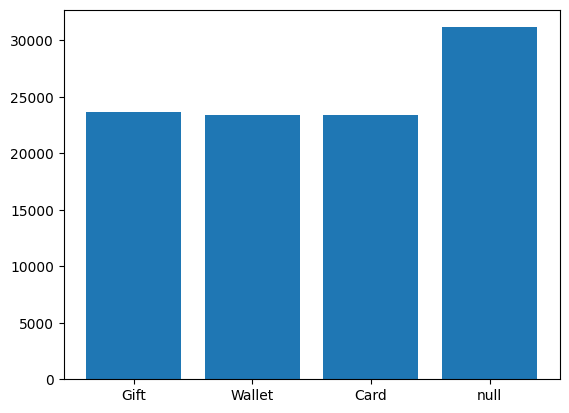

In [16]:
showRatio(df, 'payment_method')

Create new columns to store if payment is null, and filled the old one with 'ffill'

In [17]:
df_cat['null_payment'] = np.where(df['payment_method'].isnull, 1, 0)

df_cat['payment_method'].ffill(inplace = True)
df_cat

/tmp/ipykernel_58524/1873730839.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat['payment_method'].ffill(inplace = True)


,region,platform,device_type,payment_method,language,account_status,player_type_tag,null_payment
0,LATAM,PC,Phone,Wallet,DE,Active,Social,1
1,NaN,Console,Desktop,Card,ES,Dormant,Collector,1
2,NaN,PC,Laptop,Card,EN,Dormant,Casual,1
3,NaN,Console,Tablet,Card,ES,Dormant,Competitive,1
4,NaN,PC,Tablet,Gift,EN,Active,Casual,1
...,...,...,...,...,...,...,...,...
101653,APAC,Console,Tablet,Card,KR,Active,Social,1
101654,EU,Console,Phone,Card,DE,NaN,Casual,1
101655,LATAM,Console,Tablet,Gift,ES,NaN,Social,1
101656,LATAM,Console,Desktop,Card,ES,Active,Competitive,1


In [18]:
df_cat['payment_method'].isnull().sum()

np.int64(0)

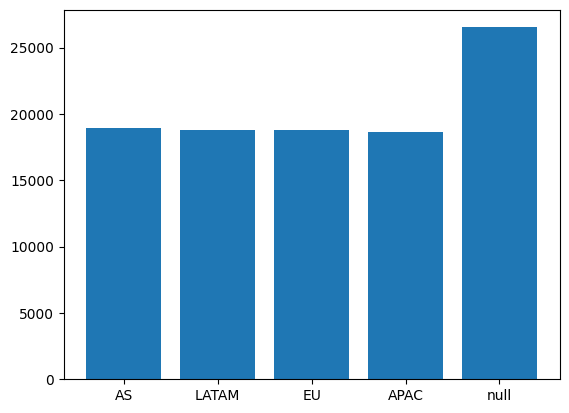

In [19]:
showRatio(df_cat, 'region')

In [20]:
df_cat['null_region'] = np.where(df['region'].isnull, 1, 0)

df_cat['region'].ffill(inplace = True)
df_cat

/tmp/ipykernel_58524/1438532610.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat['region'].ffill(inplace = True)


,region,platform,device_type,payment_method,language,account_status,player_type_tag,null_payment,null_region
0,LATAM,PC,Phone,Wallet,DE,Active,Social,1,1
1,LATAM,Console,Desktop,Card,ES,Dormant,Collector,1,1
2,LATAM,PC,Laptop,Card,EN,Dormant,Casual,1,1
3,LATAM,Console,Tablet,Card,ES,Dormant,Competitive,1,1
4,LATAM,PC,Tablet,Gift,EN,Active,Casual,1,1
...,...,...,...,...,...,...,...,...,...
101653,APAC,Console,Tablet,Card,KR,Active,Social,1,1
101654,EU,Console,Phone,Card,DE,NaN,Casual,1,1
101655,LATAM,Console,Tablet,Gift,ES,NaN,Social,1,1
101656,LATAM,Console,Desktop,Card,ES,Active,Competitive,1,1


At the moment we will assume that the data have normal distributed, and we will replace the null value for each remaining columns as the mode of it.

In [21]:
remain_cat = create_null_table(df_cat)

remain_cat

,Missing value counts,Missing value percentage
player_type_tag,7920,7.8
language,7898,7.8
device_type,7814,7.7
account_status,7717,7.6
platform,7681,7.6


In [22]:
for i in remain_cat.index:
    df_cat.fillna({i: df_cat[i].mode()[0]}, inplace = True)

df_cat

,region,platform,device_type,payment_method,language,account_status,player_type_tag,null_payment,null_region
0,LATAM,PC,Phone,Wallet,DE,Active,Social,1,1
1,LATAM,Console,Desktop,Card,ES,Dormant,Collector,1,1
2,LATAM,PC,Laptop,Card,EN,Dormant,Casual,1,1
3,LATAM,Console,Tablet,Card,ES,Dormant,Competitive,1,1
4,LATAM,PC,Tablet,Gift,EN,Active,Casual,1,1
...,...,...,...,...,...,...,...,...,...
101653,APAC,Console,Tablet,Card,KR,Active,Social,1,1
101654,EU,Console,Phone,Card,DE,Active,Casual,1,1
101655,LATAM,Console,Tablet,Gift,ES,Active,Social,1,1
101656,LATAM,Console,Desktop,Card,ES,Active,Competitive,1,1


Check if their are still null value remain

In [23]:
create_null_table(df_cat)

,Missing value counts,Missing value percentage


Change data into binary

In [24]:
df_cat_bin = pd.get_dummies(df_cat, drop_first = False)
df_cat_bin.head()

,null_payment,null_region,region_APAC,region_AS,region_EU,region_LATAM,platform_Console,platform_Mobile,platform_PC,device_type_Desktop,...,language_ES,language_FR,language_JP,language_KR,account_status_Active,account_status_Dormant,player_type_tag_Casual,player_type_tag_Collector,player_type_tag_Competitive,player_type_tag_Social
0,1,1,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1,1,1,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,False,True,False,False
2,1,1,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3,1,1,False,False,False,True,True,False,False,False,...,True,False,False,False,False,True,False,False,True,False
4,1,1,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False


Ordinal data

In [25]:
df_ordinal = df[to_num_cat]

df_ordinal.head()

,engagement_level,loyalty_tier,skill_tier
0,Low,Silver,NaN
1,Low,Platinum,Gold
2,High,Diamond,Gold
3,Veteran,Silver,Gold
4,Mid,Silver,NaN


Engagement_level

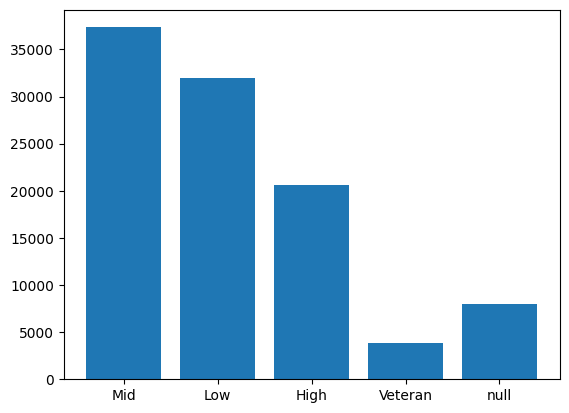

In [26]:
showRatio(df, 'engagement_level')

Loyalty_tier

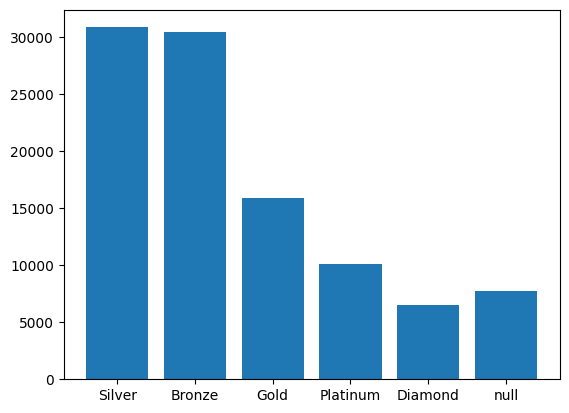

In [27]:
showRatio(df_ordinal, 'loyalty_tier')

Skill tier

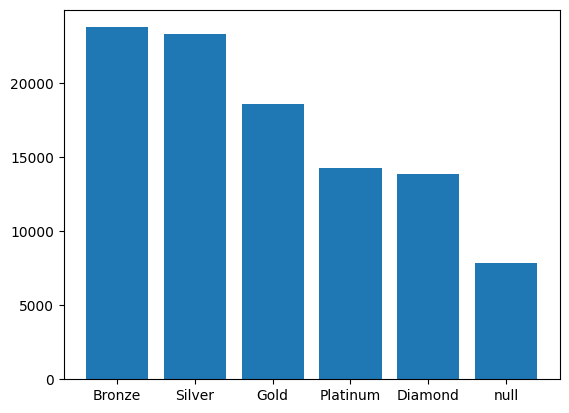

In [28]:
showRatio(df_ordinal, 'skill_tier')

In [29]:
ranks = {
'engagement_level': {'Low': 1, 'Mid':2, 'High': 3, 'Veteran': 4},
'loyalty_tier': {'Bronze': 1, 'Silver':2, 'Gold': 3, 'Platinum': 4, 'Diamond': 5},
'skill_tier': {'Bronze': 1, 'Silver':2, 'Gold': 3, 'Platinum': 4, 'Diamond': 5}
}

#map rank
for i in df_ordinal:
    df_ordinal[i] = df_ordinal[i].map(ranks[i])
    
df_ordinal.head()

/tmp/ipykernel_58524/74144443.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordinal[i] = df_ordinal[i].map(ranks[i])
/tmp/ipykernel_58524/74144443.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordinal[i] = df_ordinal[i].map(ranks[i])
/tmp/ipykernel_58524/74144443.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,engagement_level,loyalty_tier,skill_tier
0,1.0,2.0,NaN
1,1.0,4.0,3.0
2,3.0,5.0,3.0
3,4.0,2.0,3.0
4,2.0,2.0,NaN


In these ordinal data, we will assume that the null value might be because they didn't answer/ or lowest of all. So, we will give the null data as 0

In [30]:
df_ordinal.fillna(0, inplace = True)

df_ordinal.isnull().any()

/tmp/ipykernel_58524/3681328505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordinal.fillna(0, inplace = True)


engagement_level    False
loyalty_tier        False
skill_tier          False
dtype: bool

### Feature Engineering

In [31]:
cols = ['platform', 'segment']

df[cols]


,platform,segment
0,PC,0
1,Console,2
2,PC,3
3,Console,3
4,PC,1
...,...,...
101653,Console,1
101654,Console,0
101655,Console,2
101656,Console,3


# Step 2: Training Preparation

Step 2.1: Merge data

In [32]:
df_prep = pd.concat([df_num_filled, df_cat_bin, df_ordinal], axis = 1)

df_prep.head()

,play_frequency,avg_session_duration,total_playtime_hours,login_streak,days_since_last_login,total_spending_thb,avg_monthly_spending,spending_frequency,friend_count,team_play_percentage,...,language_KR,account_status_Active,account_status_Dormant,player_type_tag_Casual,player_type_tag_Collector,player_type_tag_Competitive,player_type_tag_Social,engagement_level,loyalty_tier,skill_tier
0,5.495437,24.837349,2740.945124,60.000000,56.034052,58219.915660,434.038311,17.790970,58.0,47.791178,...,False,True,False,False,False,False,True,1.0,2.0,0.0
1,9.991089,88.376322,1643.677401,22.000000,75.036888,28966.163953,4233.532935,28.862134,276.0,52.789877,...,False,False,True,False,True,False,False,1.0,4.0,3.0
2,14.234225,101.712292,2828.479467,66.000000,40.142612,44478.823835,4849.491895,22.536406,71.0,58.267306,...,False,False,True,True,False,False,False,3.0,5.0,3.0
3,3.373683,191.975841,1915.082950,80.000000,0.127910,57074.116993,6863.516123,10.565666,105.0,67.274038,...,False,False,True,False,False,True,False,4.0,2.0,3.0
4,22.469353,28.042509,517.921948,54.708112,45.078460,33249.740245,4408.101247,11.226504,111.0,50.677100,...,False,True,False,True,False,False,False,2.0,2.0,0.0


In [33]:
df_prep.isnull().any()

play_frequency                 False
avg_session_duration           False
total_playtime_hours           False
login_streak                   False
days_since_last_login          False
                               ...  
player_type_tag_Competitive    False
player_type_tag_Social         False
engagement_level               False
loyalty_tier                   False
skill_tier                     False
Length: 66, dtype: bool

Step 2.2: Split data

In [34]:
X = df_prep.drop(columns = 'segment')

X

,play_frequency,avg_session_duration,total_playtime_hours,login_streak,days_since_last_login,total_spending_thb,avg_monthly_spending,spending_frequency,friend_count,team_play_percentage,...,language_KR,account_status_Active,account_status_Dormant,player_type_tag_Casual,player_type_tag_Collector,player_type_tag_Competitive,player_type_tag_Social,engagement_level,loyalty_tier,skill_tier
0,5.495437,24.837349,2740.945124,60.000000,56.034052,58219.915660,434.038311,17.790970,58.0,47.791178,...,False,True,False,False,False,False,True,1.0,2.0,0.0
1,9.991089,88.376322,1643.677401,22.000000,75.036888,28966.163953,4233.532935,28.862134,276.0,52.789877,...,False,False,True,False,True,False,False,1.0,4.0,3.0
2,14.234225,101.712292,2828.479467,66.000000,40.142612,44478.823835,4849.491895,22.536406,71.0,58.267306,...,False,False,True,True,False,False,False,3.0,5.0,3.0
3,3.373683,191.975841,1915.082950,80.000000,0.127910,57074.116993,6863.516123,10.565666,105.0,67.274038,...,False,False,True,False,False,True,False,4.0,2.0,3.0
4,22.469353,28.042509,517.921948,54.708112,45.078460,33249.740245,4408.101247,11.226504,111.0,50.677100,...,False,True,False,True,False,False,False,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101653,17.189970,125.413304,4042.198275,47.000000,42.264454,30455.881472,5058.189653,9.852469,179.0,11.689707,...,True,True,False,False,False,False,True,3.0,1.0,1.0
101654,7.560260,120.962552,1799.108384,20.000000,27.647682,29782.184066,1516.687257,8.235531,52.0,5.000000,...,False,True,False,True,False,False,False,1.0,0.0,5.0
101655,11.765396,38.541917,1097.814242,25.000000,47.259330,39479.658717,3147.264423,9.703321,149.0,44.062523,...,False,True,False,False,False,False,True,3.0,2.0,0.0
101656,12.898003,64.701401,3563.506452,120.000000,6.810932,48523.945493,1596.091703,31.721567,193.0,59.351458,...,False,True,False,False,False,True,False,2.0,3.0,1.0


In [35]:
y = df_prep['segment']

y

0         0.0
1         2.0
2         3.0
3         3.0
4         1.0
         ... 
101653    1.0
101654    0.0
101655    2.0
101656    3.0
101657    3.0
Name: segment, Length: 101658, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

Check the distribution

In [37]:
y_train.value_counts() / y_train.shape[0]

segment
0.0    0.393805
1.0    0.249333
2.0    0.202269
3.0    0.154593
Name: count, dtype: float64

In [38]:
y_test.value_counts() / y_test.shape[0]

segment
0.0    0.396813
1.0    0.254279
2.0    0.200964
3.0    0.147944
Name: count, dtype: float64

## Step 3: Modeling

In [39]:
import xgboost as xgb
# learning_rate_range = np.arange(0.01, 1, 0.05)

# test_XG = []
# train_XG = []

# for lr in learning_rate_range:
#     xgb_classifier = xgb.XGBClassifier(
#                       eta = lr,
#                       max_depth = 6,
#                       n_estimators = 2000,
#                       colsample_bytree = 0.8,
#                       reg_alpha = 0.1,
#                       reg_lambda = 1,
#                       scale_pos_weight = 1,
#                       gamma = 0.9
#                       )
#     xgb_classifier.fit(X_train, y_train)
#     train_XG.append(xgb_classifier.score(X_train, y_train))
#     test_XG.append(xgb_classifier.score(X_test, y_test))


In [ ]:
xgb_classifier = xgb.XGBClassifier(
                    eta = 0.1,
                    max_depth = 6,
                    n_estimators = 2000,
                    colsample_bytree = 0.8,
                    reg_alpha = 0.1,
                    reg_lambda = 1,
                    gamma = 0.9
                    )

#xgb_classifier.fit(X_train, y_train)

In [41]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    objective='multiclassova',
    num_class=4,
    metric='multi_logloss',
    boosting_type='gbdt',
    num_leaves=128,
    max_bin=255,
    bagging_fraction=0.8,
    feature_fraction=0.9, 
    learning_rate=0.1,
    shrinkage_rate=0.08,
    tree_learning='feature',
    cross_entropy=0.7,
    drop_rate=0.2,
    seed=42,
    n_estimators=250,
    verbosity=-1
)

#lgbm.fit(X_train, y_train)


In [42]:
from catboost import CatBoostClassifier

cat_features = X_train.select_dtypes('object').columns.tolist()
one_hot_max_size = 10

cat = CatBoostClassifier(
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    bagging_temperature=0,
    border_count=128,
    loss_function="MultiClass",
    verbose=False,
    cat_features=cat_features,
    one_hot_max_size=5
)

# model = OneVsRestClassifier(cat)

# cat.fit(X_train, y_train)


In [43]:
import joblib

joblib.dump(cat, 'task2/cat.pkl')
joblib.dump(xgb_classifier, 'task2/xgb.pkl')
joblib.dump(lgbm, 'task2/lgbm.pkl')

['task2/lgbm.pkl']

## Ensemble Models

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [
    ('xgb', xgb_classifier), ('lgbm', lgbm)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=cat
)

clf.fit(X_train,y_train)
clf.score(X_test, y_test)

/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [10:09:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [10:11:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [10:12:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/xgbo

0.8280542986425339

In [45]:
joblib.dump(clf,'task2/Ensemble.pkl')

['task2/Ensemble.pkl']

## Step 4: Evaluation

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [47]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8280542986425339

In [52]:
f1_score(y_test, y_pred, average = 'weighted')

0.8275312180683323

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[3568,  284,  159,   23],
       [ 374, 2057,   69,   85],
       [ 224,   75, 1612,  132],
       [  38,  126,  159, 1181]])

In [49]:
y_pred = lgbm.predict(X_test)
y_pred = np.argmax(y_pred, axis =1)
accuracy = accuracy_score(y_test, y_pred)
accuracy

NotFittedError: Estimator not fitted, call fit before exploiting the model.

In [ ]:
y_pred = cat.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8240704308479244

In [ ]:
columns = X_train.columns.tolist()
cat_feat = pd.DataFrame(cat.feature_importances_)
cat_feat['feature'] = columns

cat_feat.sort_values(by=0,ascending=False).T

AttributeError: 'StackingClassifier' object has no attribute 'feature_importances_'

## Step 5: Predict test value

In [54]:
model = joblib.load("Ensemble.pkl")

In [55]:
df_test = pd.read_csv('task2/test.csv')

df_test

,id,player_id,play_frequency,avg_session_duration,total_playtime_hours,login_streak,days_since_last_login,total_spending_thb,avg_monthly_spending,spending_frequency,...,region,platform,device_type,payment_method,language,account_status,player_type_tag,engagement_level,loyalty_tier,skill_tier
0,ANS00001,P106074,4.917599,50.951821,1610.535142,3.0,40.047516,61031.190124,5403.618682,21.099955,...,NaN,PC,Tablet,NaN,EN,Active,Competitive,Mid,Diamond,Gold
1,ANS00002,P024878,8.060471,81.376671,543.088681,104.0,37.296412,10862.656232,NaN,17.909547,...,EU,Mobile,Laptop,Card,ES,Active,NaN,Mid,Silver,Bronze
2,ANS00003,P033678,NaN,27.707037,721.533684,14.0,52.484579,27515.141077,1098.230071,26.183854,...,NaN,PC,Phone,Wallet,ES,Dormant,Collector,Low,Bronze,Platinum
3,ANS00004,P020935,27.002787,26.859972,1442.810933,62.0,43.851594,5299.499711,NaN,3.228531,...,APAC,PC,Phone,Wallet,ES,Dormant,Competitive,NaN,Bronze,Silver
4,ANS00005,P049711,6.188164,49.545383,2039.185739,8.0,15.519366,7491.446985,1645.853549,27.231039,...,LATAM,Console,Desktop,Wallet,ES,Dormant,Competitive,Low,Silver,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25884,ANS25885,P027029,8.775808,136.657801,NaN,104.0,27.716894,52024.435292,6542.959252,8.943746,...,AS,Console,Desktop,Wallet,DE,Active,Competitive,Mid,Silver,Platinum
25885,ANS25886,P084134,14.578502,142.806569,1377.660175,112.0,42.323686,34027.337870,5003.671636,6.884182,...,NaN,NaN,NaN,NaN,ES,NaN,Collector,Veteran,Silver,Gold
25886,ANS25887,P072499,7.211300,121.502257,3141.188491,43.0,19.584220,NaN,NaN,31.886739,...,NaN,PC,Tablet,NaN,ES,Dormant,Collector,High,NaN,Gold
25887,ANS25888,P011845,2.345938,46.367655,2647.562555,65.0,2.344132,50515.411004,3160.661119,11.481060,...,NaN,PC,Desktop,Wallet,DE,Dormant,Social,Low,Bronze,Diamond


In [56]:
df_test.drop(['id', 'player_id'], axis = 1, inplace = True)
df_test['null_payment'] = np.where(df_test['payment_method'].isnull, 1, 0)
df_test['null_region'] = np.where(df_test['region'].isnull, 1, 0)

df_test_cat = df_test.select_dtypes('object')
df_test_num = df_test.select_dtypes('number')

#Ordinal data
df_test_cat.drop(to_num_cat, axis = 1, inplace = True)
df_test_ordinal = df_test[to_num_cat]
# Impute numerical data
df_mice_test = df_test_num.copy(deep=True)
mice_imputer = IterativeImputer()
df_mice_test = mice_imputer.fit_transform(df_mice_test)
df_test_filled = pd.DataFrame(df_mice_test, columns = df_test_num.columns)

# Impute categorical data
for i in df_test_cat:
    df_test_cat[i].fillna(df_test_cat[i].mode()[0], inplace = True)
    
# Ordinal data
for i in df_test_ordinal:
    df_test_ordinal[i] = df_test_ordinal[i].map(ranks[i])
df_test_ordinal.fillna(0, inplace =True)

df_test_cat_bin = pd.get_dummies(df_test_cat, drop_first = False)

/tmp/ipykernel_58524/1447696838.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_cat[i].fillna(df_test_cat[i].mode()[0], inplace = True)
/tmp/ipykernel_58524/1447696838.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_ordinal[i] = df_test_ordinal[i].map(ranks[i])


In [57]:
df_test_filled = pd.concat([df_test_filled, df_test_cat_bin, df_test_ordinal], axis = 1)
df_test_filled.head()

,play_frequency,avg_session_duration,total_playtime_hours,login_streak,days_since_last_login,total_spending_thb,avg_monthly_spending,spending_frequency,friend_count,team_play_percentage,...,language_KR,account_status_Active,account_status_Dormant,player_type_tag_Casual,player_type_tag_Collector,player_type_tag_Competitive,player_type_tag_Social,engagement_level,loyalty_tier,skill_tier
0,4.917599,50.951821,1610.535142,3.0,40.047516,61031.190124,5403.618682,21.099955,94.532001,35.339683,...,False,True,False,False,False,True,False,2.0,5.0,3.0
1,8.060471,81.376671,543.088681,104.0,37.296412,10862.656232,3379.431502,17.909547,99.461578,76.929090,...,False,True,False,False,False,True,False,2.0,2.0,1.0
2,11.943728,27.707037,721.533684,14.0,52.484579,27515.141077,1098.230071,26.183854,86.000000,44.338151,...,False,False,True,False,True,False,False,1.0,1.0,4.0
3,27.002787,26.859972,1442.810933,62.0,43.851594,5299.499711,2738.849982,3.228531,111.000000,49.487524,...,False,False,True,False,False,True,False,0.0,1.0,2.0
4,6.188164,49.545383,2039.185739,8.0,15.519366,7491.446985,1645.853549,27.231039,148.000000,57.614515,...,False,False,True,False,False,True,False,1.0,2.0,4.0


In [58]:
len(df_test_filled)

25889

In [59]:
y_pred = model.predict(df_test_filled)

y_pred

/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2., 0., 0., ..., 1., 0., 3.], shape=(25889,))

In [62]:
df_ans = pd.read_csv('Answer.csv')
df_ans.head()

,id,task1,task2,task3,task4,task5
0,ANS00001,1.0,2.0,0.000000,0,0.0
1,ANS00002,0.0,0.0,1768.238286,0,0.0
2,ANS00003,0.0,0.0,178031.889920,4,0.0
3,ANS00004,0.0,0.0,0.000000,0,0.0
4,ANS00005,1.0,0.0,0.000000,3,0.0


In [63]:
df_ans['task2'] = y_pred
df_ans.to_csv("Answer.csv", index = False)